### **Convolutional Neural Networks in Keras**

Lets take a look at the build in CNN layers, image processing functions and all the other CNN related stuff that Keras comes with to build CNNs and work with image data

==**IMPORTANT**==
This section does not go into the depths of the theory behind CNNs and assumes that you have a good overall understanding of CNNs and related concepts. </br>

[Here's a good article to refresh your knowledge on CNNs](https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/)


#### **Convolution Layers**

[Lets check out the Convolution Layers in Detail here](https://keras.io/api/layers/convolution_layers/)

#### **Pooling Layers**

[Lets take a deeper look at Keras's Pooling Layers](https://keras.io/api/layers/pooling_layers/)

#### **Flatten Layer**

[Check it out here](https://keras.io/api/layers/reshaping_layers/flatten/)

### **Data Preprocessing**

[Check out the CIFAR10 Dataset details on its official page](https://www.cs.toronto.edu/~kriz/cifar.html)

In [1]:
## lets import everything we need here
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
## lets import the inbuilt dataset first
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print(f"Training Images Shape: {x_train.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Test images shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Training Images Shape: (50000, 32, 32, 3)
Training Labels Shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [4]:
## lets get the class labels first from the website
NUM_CLASSES = 10
classes = [
           'airplane', 
           'automobile', 
           'bird', 
           'cat', 
           'deer',
           'dog', 
           'frog', 
           'horse', 
           'ship', 
           'truck'
           ]

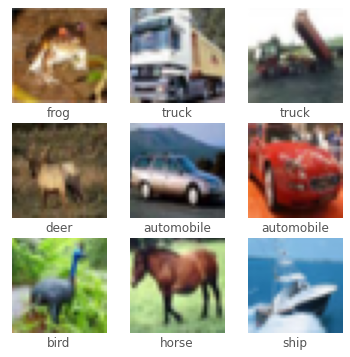

In [5]:
## visualize the dataset
plt.figure(figsize=(6, 6))

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x_train[i])
  plt.xlabel(classes[y_train[i].item()])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

plt.show();

In [6]:
## normalize the images

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [7]:
# just checking to confirm
x_train[0].dtype, x_train[0].max(), x_train[0].min()

(dtype('float32'), 1.0, 0.0)

#### **Difference between categorical_crossentropy and sparse_categorical_crossentropy**

Before we proceed to one-hot encode the labels, it is important to mention here that keras provides two loss functions to deal with multi-class categorical classification 
- categorical_crossentropy -- use this when you have one-hot enoded labels
- sparse_categorical_crossentropy -- use this when you have integer labels 


In [8]:
## one hot encode the labels -- we currently have integer labels 
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [9]:
y_train[0].shape, y_test[0].shape

((10,), (10,))

#### **Building the model**

In [10]:
## lets build the model 
model = Sequential()

##### **Top (convolution) part of the model**

In [11]:
## add our first convolutional layer
model.add(Conv2D(
    filters=32, 
    kernel_size=(3, 3),
    strides=(1, 1), ## with this stride and 'same' padding output remains same as input
    padding='same',  ## 'valid' means no padding -- 'same' padding applies additional padding
    activation='relu',
    input_shape=(32, 32, 3)
))

model.add(MaxPool2D(2, 2))

In [12]:
## add our second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    
model.add(MaxPool2D(2, 2))

## add our third convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
Total params: 28,640
Trainable params: 28,640
Non-trainable params: 0
_________________________________________________________________


##### **Take a moment here and check the documentation of Conv2D and MaxPool2D layers again, especially in context with our model suamry, specifically focussing on things use input-shape, output-shape, padding, etc. Use the help function for quick access**

#### **Bottom (classification) part of the model**

In [14]:
# flatten the output from conv layers
model.add(Flatten())

In [15]:
## let check the output again it should be 64*8*8 = 4096
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
Total params: 28,640
Trainable params: 28,640
Non-trainable params: 0
____________________________________________________

In [16]:
## quick tip we can also access individual layers and check their input and outputs like this
model.layers

In [17]:
model.layers[-1].output.shape ## check output of the last (flatten) layer

TensorShape([None, 4096])

In [18]:
## now lets add Dense layers
model.add(Dense(256, activation='relu'))

## output layer
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

In [20]:
optimizer = Adam(learning_rate=0.01)

In [21]:
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### **Training the model**

In [22]:
NUM_EPOCHS = 50
BATCH_SIZE = 128

In [23]:
history = model.fit(
    x_train,
    y_train,
    epochs=NUM_EPOCHS,
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_data=(x_test, y_test)
)

Epoch 1/50
391/391 [==============================] - 5s 13ms/step - loss: 1.9175 - accuracy: 0.3137 - val_loss: 1.7123 - val_accuracy: 0.3867
Epoch 2/50
391/391 [==============================] - 5s 12ms/step - loss: 1.6283 - accuracy: 0.4155 - val_loss: 1.5946 - val_accuracy: 0.4232
Epoch 3/50
391/391 [==============================] - 5s 12ms/step - loss: 1.5333 - accuracy: 0.4502 - val_loss: 1.4978 - val_accuracy: 0.4637
Epoch 4/50
391/391 [==============================] - 5s 12ms/step - loss: 1.4679 - accuracy: 0.4733 - val_loss: 1.4852 - val_accuracy: 0.4660
Epoch 5/50
391/391 [==============================] - 5s 12ms/step - loss: 1.4143 - accuracy: 0.4923 - val_loss: 1.4937 - val_accuracy: 0.4640
Epoch 6/50
391/391 [==============================] - 5s 12ms/step - loss: 1.3665 - accuracy: 0.5106 - val_loss: 1.4772 - val_accuracy: 0.4779
Epoch 7/50
391/391 [==============================] - 5s 12ms/step - loss: 1.3346 - accuracy: 0.5226 - val_loss: 1.4783 - val_accuracy: 0.4680

In [57]:
## function to plot loss and accuracy

def plot_history(history): 
  fig = plt.figure(figsize=(10, 4))
  ## accuracy plot
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Accuracy of Model')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['train', 'test'], loc='lower right')

  ## loss plot
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss of Model')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['train', 'test'], loc='upper right')

  plt.tight_layout()

  fig.show();

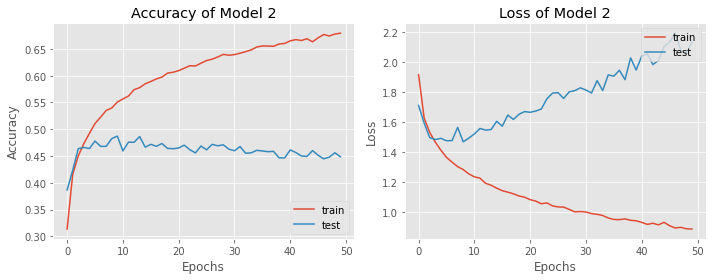

In [25]:
plot_history(history)

#### **Lets add few more things to deal with overfitting**
- Change the size and shape of conv and dense layers or add more layers
- Add dropout layers
- Add a simple learning rate scheduler to change learning rate as the training progresses

In [46]:
model2 = Sequential()

In [47]:
## first layer
model2.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model2.add(MaxPool2D((2, 2)))

## second conv layer
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.3)) ## dropout layer with 30% dropout rate

## third layer 
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.3)) ## dropout layer with 30% dropout rate

## flatten
model2.add(Flatten())

## dense layer one
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.3))

## output layer
model2.add(Dense(NUM_CLASSES, activation='softmax'))

In [48]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 64)         

#### **Lets add a simple learning rate scheduler before compiling the model**

In [49]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [50]:
# learning rate schedule
def simple_decay(epoch, lr):

  if epoch < 30:
    lrate = lr
  elif epoch < 60:
    lrate = 0.0005
  else:
    lrate = 0.0001
  return lrate

In [51]:
## create scheduler
scheduler = LearningRateScheduler(simple_decay)

In [52]:
callbacks = [scheduler]

In [53]:
optimizer = Adam(learning_rate=0.001)

In [54]:
model2.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy']
              )

In [55]:
history2 = model2.fit(x_train, y_train, epochs=100, 
                    batch_size=128,
                    shuffle=True,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks)

Epoch 1/100
391/391 [==============================] - 6s 15ms/step - loss: 1.6703 - accuracy: 0.3841 - val_loss: 1.3623 - val_accuracy: 0.5130 - lr: 0.0010
Epoch 2/100
391/391 [==============================] - 6s 14ms/step - loss: 1.3088 - accuracy: 0.5316 - val_loss: 1.1428 - val_accuracy: 0.6019 - lr: 0.0010
Epoch 3/100
391/391 [==============================] - 6s 14ms/step - loss: 1.1563 - accuracy: 0.5874 - val_loss: 1.0708 - val_accuracy: 0.6190 - lr: 0.0010
Epoch 4/100
391/391 [==============================] - 6s 14ms/step - loss: 1.0601 - accuracy: 0.6223 - val_loss: 0.9340 - val_accuracy: 0.6689 - lr: 0.0010
Epoch 5/100
391/391 [==============================] - 6s 14ms/step - loss: 0.9884 - accuracy: 0.6504 - val_loss: 0.8851 - val_accuracy: 0.6961 - lr: 0.0010
Epoch 6/100
391/391 [==============================] - 6s 14ms/step - loss: 0.9348 - accuracy: 0.6700 - val_loss: 0.8562 - val_accuracy: 0.6981 - lr: 0.0010
Epoch 7/100
391/391 [==============================] - 6s 

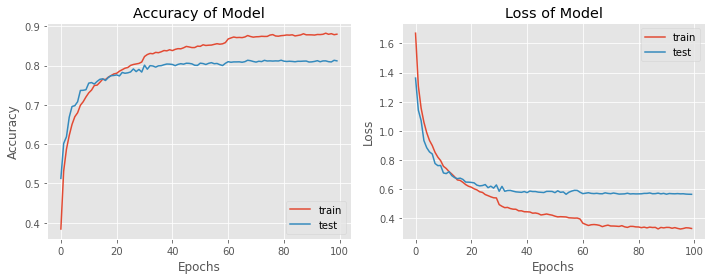

In [58]:
plot_history(history2)

### **Exercises**
- Exercise 1. Try different model arcihtectures and hyperparameters to improve the performance further

- Exercise 2. Implement a CNN for MNIST Dataset and share your results 

### **Bonus**

- Try to use BatchNormalization and GlobalMaxPooling layers in CNNs